In [5]:
cd Documents/GitHub/La_Jara/Hysteresis/SM2022-Sonde-Storm2

C:\Users\huck4481\Documents\GitHub\La_Jara\Hysteresis\SM2022-Sonde-Storm2


In [6]:
#Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

#Import Data
depth = pd.read_csv('Piezo2A-Summer2022.csv').iloc[2576:2625]
sonde = pd.read_csv('Sonde_Summer2022_Storm2.csv').iloc[0:69]
#Putting everything in one df
sonde.rename(columns={'datetime': 'Time'}, inplace=True)
df = pd.merge(depth, sonde, on='Time', how='left')
#Converting into a date-time kind of variable
from datetime import datetime as dt
date = []
for fecha in df['Time']:
    date_time_obj = dt.strptime(fecha, '%m/%d/%Y %H:%M')
    date.append(date_time_obj)

new_dates = pd.DataFrame(date)
df['new_dates'] = date

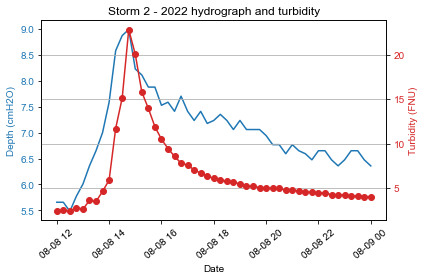

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cmH2O)', color=color)
ax1.plot(df['new_dates'], df['Pressure[cmH2O]'], color=color, linestyle="-")
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
    
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(df['new_dates'], df['Turbidity'], "o-", color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Storm 2 - 2022 hydrograph and turbidity")
plt.grid()
sns.set_style("whitegrid")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Storm2_2022_turbidity.png", dpi=300)
plt.show()

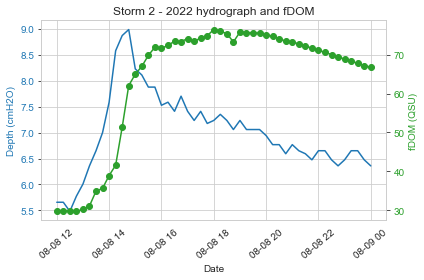

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cmH2O)', color=color)
ax1.plot(df['new_dates'], df['Pressure[cmH2O]'], color=color, linestyle="-")
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
    
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(df['new_dates'], df['fDOM'], "o-", color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Storm 2 - 2022 hydrograph and fDOM")
plt.grid()
sns.set_style("whitegrid")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Storm2_2022_fDOM.png", dpi=300)
plt.show()

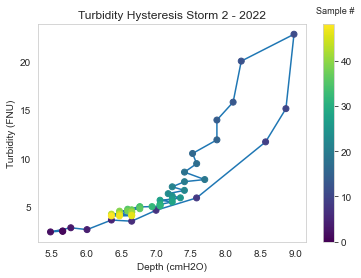

In [9]:
plt.plot(df['Pressure[cmH2O]'], df['Turbidity'], zorder=0)
cm = plt.cm.get_cmap('viridis')
sc = plt.scatter(df['Pressure[cmH2O]'], df['Turbidity'], c=range(49), cmap=cm, zorder=100)

plt.colorbar(sc)
plt.text(9.3,25,'Sample #', fontsize=9)

plt.xlabel("Depth (cmH2O)")
plt.ylabel("Turbidity (FNU)")
plt.title("Turbidity Hysteresis Storm 2 - 2022")

plt.grid()
sns.set_style("whitegrid")
plt.savefig("Turbidity_Hyst_Storm2_2022.png", dpi=300)
plt.show()

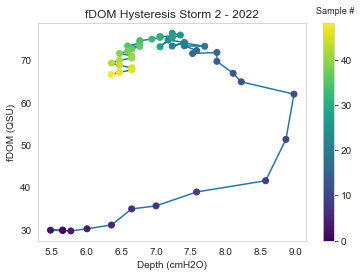

In [10]:
plt.plot(df['Pressure[cmH2O]'], df['fDOM'], zorder=0)
cm = plt.cm.get_cmap('viridis')
sc = plt.scatter(df['Pressure[cmH2O]'], df['fDOM'], c=range(49), cmap=cm, zorder=100)

plt.colorbar(sc)
plt.text(9.3,81,'Sample #', fontsize=9)

plt.xlabel("Depth (cmH2O)")
plt.ylabel("fDOM (QSU)")
plt.title("fDOM Hysteresis Storm 2 - 2022")

plt.grid()
sns.set_style("whitegrid")
plt.savefig("fDOMy_Hyst_Storm2_2022.png", dpi=300)
plt.show()

## Plots for my AGU poster

In [11]:
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)
    
    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

font = {'fontname':'Tenorite'}

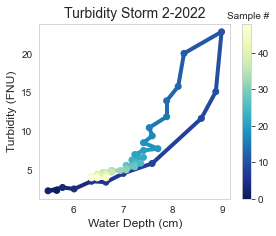

In [13]:
fig, (ax1) = plt.subplots(figsize=(4,3))
#sns.set_style('darkgrid')
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout(h_pad=100)

z = np.linspace(0, 1, len(df['Pressure[cmH2O]']))
colorline(df['Pressure[cmH2O]'], df['Turbidity'], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
sc =ax1.scatter(df['Pressure[cmH2O]'], df['Turbidity'], c=range(49), cmap=cm, zorder=100)
plt.grid(False)
plt.colorbar(sc, ax=ax1)
plt.text(9.1,24.5,'Sample #', fontsize=10)
ax1.set_title('Turbidity Storm 2-2022', fontsize=14)
ax1.set_ylabel("Turbidity (FNU)", fontsize=12)
ax1.set_xlabel("Water Depth (cm)", fontsize=12)

plt.savefig("AGU_turb2_Hysteresis.png", bbox_inches = 'tight', dpi=1000)

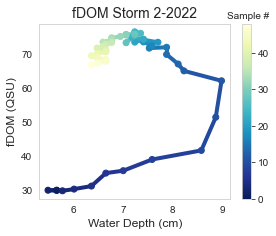

In [15]:
fig, (ax1) = plt.subplots(figsize=(4,3))
#sns.set_style('darkgrid')
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout(h_pad=100)

z = np.linspace(0, 1, len(df['Pressure[cmH2O]']))
colorline(df['Pressure[cmH2O]'], df['fDOM'], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
sc =ax1.scatter(df['Pressure[cmH2O]'], df['fDOM'], c=range(49), cmap=cm, zorder=100)
plt.grid(False)
plt.colorbar(sc, ax=ax1)
plt.text(9.1,80.2,'Sample #', fontsize=10)
ax1.set_title('fDOM Storm 2-2022', fontsize=14)
ax1.set_ylabel("fDOM (QSU)", fontsize=12)
ax1.set_xlabel("Water Depth (cm)", fontsize=12)

plt.savefig("AGU_fDOM2_Hysteresis.png", bbox_inches = 'tight', dpi=1000)